In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

Comparing the two sample sizes, looks like the 30 one is more manageable to work with, since the 100 one takes alot longer to load and perform calculations on. 

In [3]:
g = nx.read_graphml("graphs/artists_graph_connected_30.graphml")
g
print(g)

Graph with 743 nodes and 23508 edges


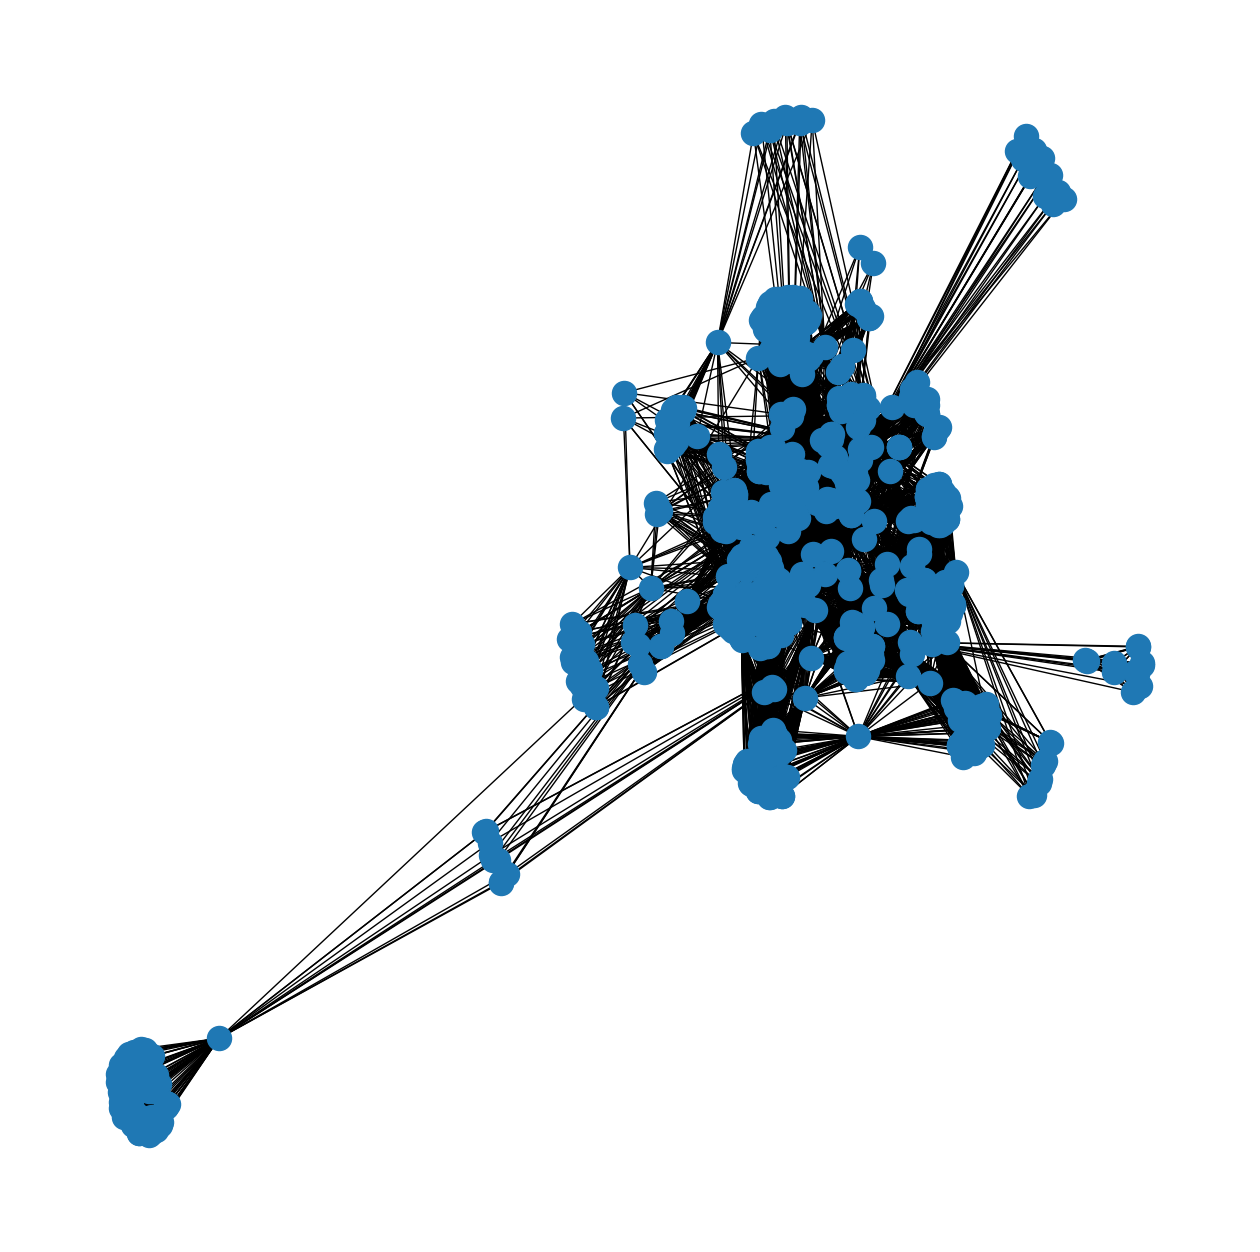

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(16,16))
nx.draw_networkx(g, ax=ax, with_labels=False)
plt.axis("off")
plt.show()

Graph with 1860 nodes and 82404 edges


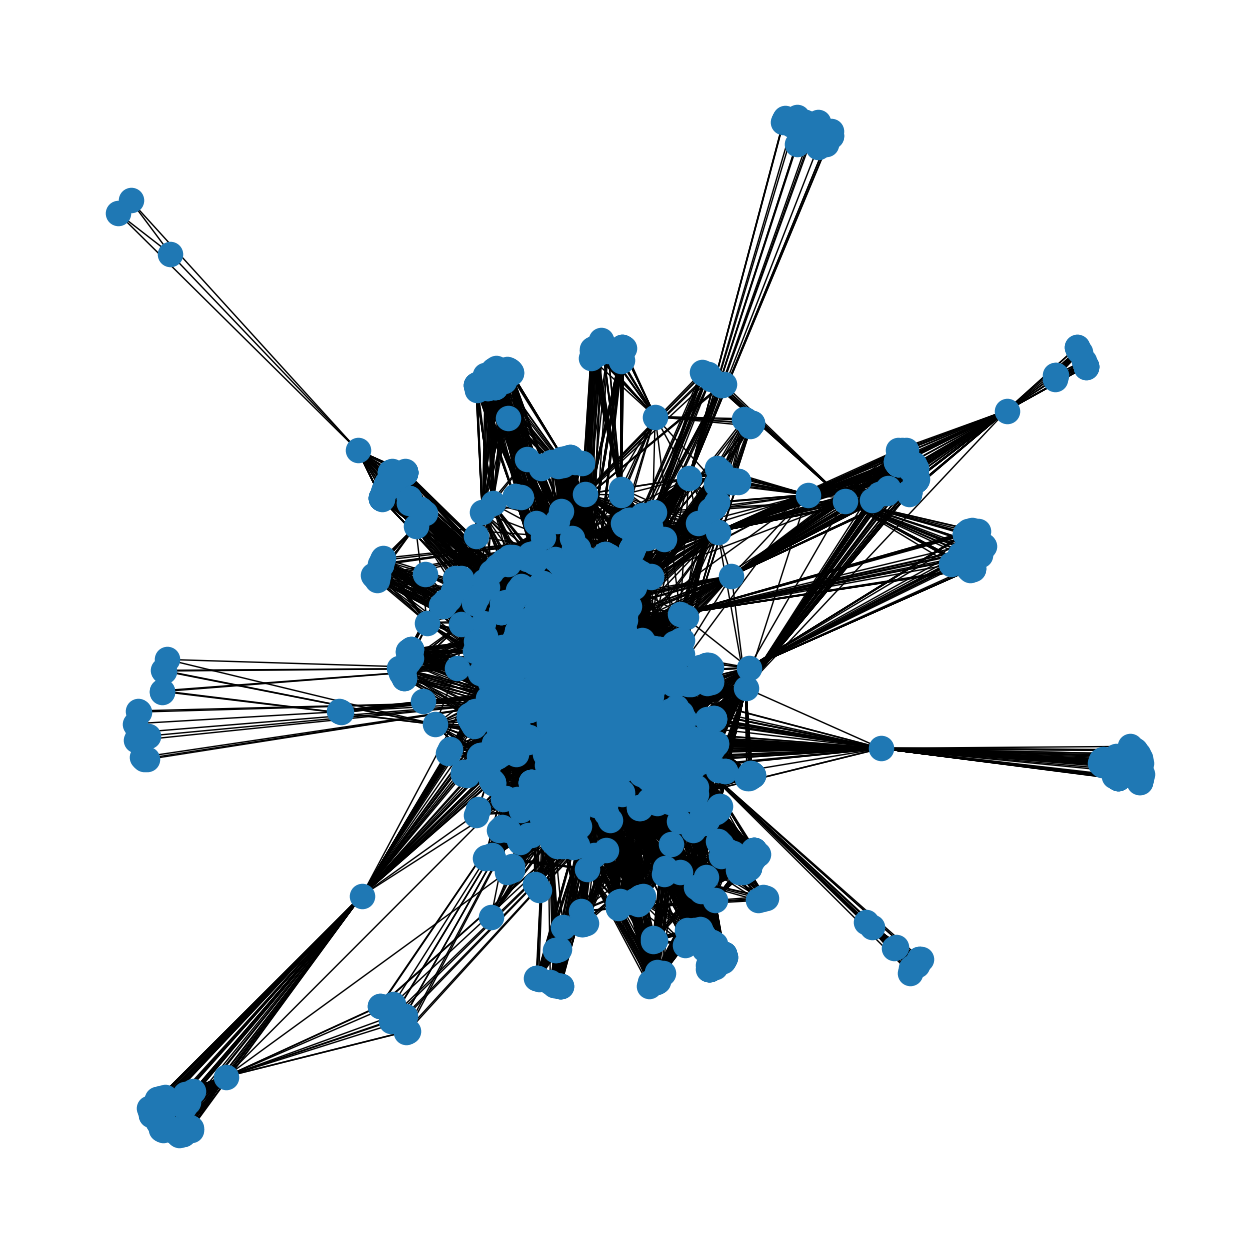

In [4]:
g100 = nx.read_graphml("graphs/artists_graph_connected_100.graphml")
print(g100)
fig, ax = plt.subplots(1, 1, figsize=(16,16))
nx.draw_networkx(g100, ax=ax, with_labels=False)
plt.axis("off")
plt.show()

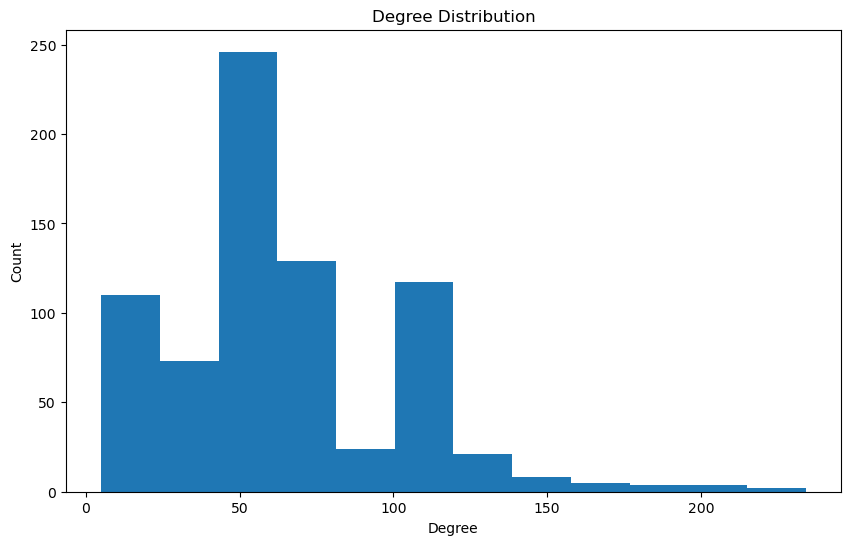

In [12]:
degrees = [deg for node, deg in g.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=12)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree Distribution")
plt.show()